In [12]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random
import cmath
import math

# Define our buildDataSet function here!

In [13]:
def buildDataSet(max_amplitude,min_sparsity,max_sparsity,vector_size,data_set_size):
    sparse_data = np.zeros((vector_size,data_set_size)) # Initialize the sparse_data matrix

    # Iterate over the columns of the sparse_data matrix to define the data samples
    for i in range(data_set_size):
        sparsity = random.randint(min_sparsity,max_sparsity)
        indices = random.sample(range(vector_size),sparsity)
        amps = random.sample(range(max_amplitude),sparsity)
        sparse_data[indices,i] = amps
    
    # Define the DFT matrix and multiply our spare_data vectors with it to find dense data
    DFT = sp.linalg.dft(vector_size)/np.sqrt(vector_size)
    dense_data = DFT@sparse_data
    return dense_data,sparse_data


## Build the dataset

In [14]:
max_amplitude = 10
min_sparsity = 3
max_sparsity = 5
vector_size = 10
data_set_size = 1000
dense_data, sparse_data = buildDataSet(max_amplitude,min_sparsity,max_sparsity,vector_size,data_set_size)


## Test the dataset

In [15]:
DFT = sp.linalg.dft(vector_size)/np.sqrt(vector_size)
iDFT = DFT.conj().T

print(iDFT@dense_data)


[[ 8.00000000e+00-1.64024749e-15j -1.53248113e-15-4.67914095e-16j
  -8.61188408e-16-8.52042069e-16j ... -7.81725884e-16-4.49267354e-16j
  -2.46678650e-17-1.46054203e-15j -1.53401491e-16-1.73392096e-15j]
 [ 0.00000000e+00-1.54270460e-15j  6.00000000e+00-3.98190435e-16j
  -7.90856765e-16-8.13014021e-16j ... -1.16316276e-15-1.14380916e-15j
   5.00000000e+00-1.10792753e-15j -1.74549794e-15-6.87359059e-16j]
 [-1.77635684e-15-1.43457387e-15j  7.00000000e+00-1.05212111e-15j
   3.00000000e+00+2.23912196e-16j ... -1.08491108e-15-8.22995781e-16j
  -6.24460593e-16+3.24420122e-16j -1.48534811e-15-1.61676426e-15j]
 ...
 [ 1.76153492e-15+1.23995749e-15j -2.66453526e-15+1.74086454e-15j
   1.00000000e+00-1.65322298e-16j ...  9.46443546e-16-1.54182997e-16j
   1.00000000e+00-3.53964274e-16j  8.00000000e+00+3.31905403e-16j]
 [ 6.00000000e+00+8.91634006e-16j -2.22044605e-15+1.06440462e-15j
  -1.55431223e-15+7.55327254e-16j ... -1.10383501e-16-2.73061357e-16j
   3.00000000e+00+8.38985457e-16j -4.79260162e-

From the above results, we can see that our vectors are very sparse if we take the IDFT

## Setting up the dataset for Pytorch

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split

X = np.concatenate((dense_data.real, dense_data.imag), axis=0).T
Y = np.concatenate((sparse_data.real, sparse_data.imag), axis=0).T

X_tensor = torch.tensor(X,dtype=torch.float)
Y_tensor = torch.tensor(Y,dtype=torch.float)
dataset = TensorDataset(X_tensor,X_tensor)

dataloader = DataLoader(dataset,batch_size = 100,shuffle = True)

## Setting up the neural network

In [17]:
# class ExponentialComplexLinear(nn.Module):
#     def __init__(self, in_features, out_features):
#         super(ExponentialComplexLinear, self).__init__()
#
#         # Trainable phase angles (real-valued), this is where we are training the q-values in the context of the exercise
#         self.phases = nn.Parameter(torch.randn(out_features, in_features) * 0.1)  # Small random initialization
#
#     def forward(self, x):
#         # Compute our matrix
#         W = torch.exp(1j * self.phases)  # Enforces |W| = 1
#
#         # Complex matrix multiplication
#         return torch.matmul(x, W.t())

# class ComplexDecoder(nn.Module):
#     def __init__(self, encoding_dim, output_dim):
#         super(ComplexDecoder, self).__init__()
#
#         self.layers = nn.Sequential(
#             nn.Linear(200,400),
#             nn.ReLU(),
#             nn.Linear(400,400),
#             nn.ReLU(),
#             nn.Linear(400,200),
#             nn.Sigmoid()
#         )
#
#     def forward(self, x):
#         return self.layers(x)


class LearnedAutoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(LearnedAutoencoder, self).__init__()
        compression_factor = input_dim / encoding_dim
        layer_size_factor = int(encoding_dim * compression_factor / 4)

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(input_dim, input_dim),
            nn.ReLU(),
        )

    def forward(self, x):
        encoder_out = self.encoder(x)
        return self.decoder(encoder_out)



## Training the model

Epoch 1, Loss: 5.853198
Epoch 2, Loss: 4.951154
Epoch 3, Loss: 5.852416
Epoch 4, Loss: 5.595560
Epoch 5, Loss: 5.530644
Epoch 6, Loss: 5.233953
Epoch 7, Loss: 4.766614
Epoch 8, Loss: 4.468463
Epoch 9, Loss: 4.464242
Epoch 10, Loss: 4.274326
Epoch 11, Loss: 4.005041
Epoch 12, Loss: 3.964439
Epoch 13, Loss: 3.196411
Epoch 14, Loss: 3.566053
Epoch 15, Loss: 3.147988
Epoch 16, Loss: 3.216093
Epoch 17, Loss: 2.592703
Epoch 18, Loss: 2.612612
Epoch 19, Loss: 2.539744
Epoch 20, Loss: 2.224935
Epoch 21, Loss: 2.435376
Epoch 22, Loss: 2.403745
Epoch 23, Loss: 2.229089
Epoch 24, Loss: 2.321243
Epoch 25, Loss: 2.465386
Epoch 26, Loss: 2.367078
Epoch 27, Loss: 2.235144
Epoch 28, Loss: 2.086623
Epoch 29, Loss: 2.294977
Epoch 30, Loss: 2.271754
Epoch 31, Loss: 2.138999
Epoch 32, Loss: 2.213861
Epoch 33, Loss: 2.095215
Epoch 34, Loss: 2.030188
Epoch 35, Loss: 2.230458
Epoch 36, Loss: 2.102549
Epoch 37, Loss: 1.995541
Epoch 38, Loss: 1.951446
Epoch 39, Loss: 2.050383
Epoch 40, Loss: 1.975440
Epoch 41,

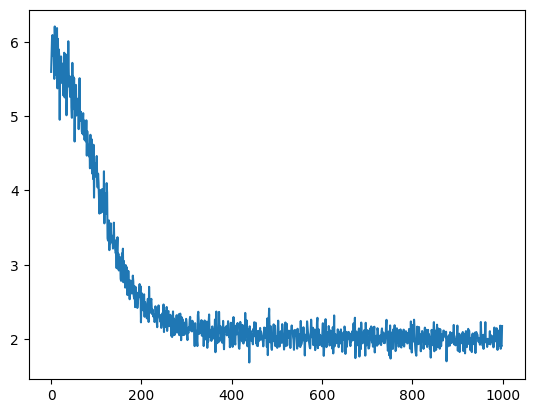

In [18]:
# Define the size of our "measurement" vector as encoding_dim. This needs to be larger than the sparsity of our matrix

encoding_dim = max_sparsity + 1
encoding_dim = 10
# Initialize model
model = LearnedAutoencoder(2*vector_size, encoding_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=1E-3, weight_decay=1E-2)
loss_fn = nn.MSELoss()

# def complex_mse_loss(input, target):
#     return F.mse_loss(input, target)

# Training loop
losses = []
for epoch in range(100):
    for batch in dataloader:
        inputs, targets = batch  # Unpack the tuple
        optimizer.zero_grad()
        output = model(inputs)
        loss = loss_fn(output, targets)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    print(f"Epoch {epoch+1}, Loss: {loss.item():.6f}")

plt.plot(losses)
plt.show()

In [20]:
print(output[-1] - X_tensor[-1])


tensor([ 8.6368e-02,  3.0572e+00,  3.6685e+00, -4.4238e+00,  6.9206e-02,
         5.1099e+00,  6.9206e-02, -4.4238e+00,  3.5737e+00,  3.0454e+00,
         0.0000e+00, -3.4628e-01,  7.4522e+00, -1.6186e+00,  2.2952e+00,
         1.5878e-15, -8.1449e-01,  3.0840e+00, -1.9904e+00,  1.4160e+00],
       grad_fn=<SubBackward0>)
